In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Part 1

### Creating a table called 'fifa' out of the file called data; downloaded from https://www.kaggle.com/karangadiya/fifa19

In [2]:
fifa = Table.read_table('data.csv')

In [3]:
fifa.show(5)

## Part 2

### Reporting the column names and number of rows in the data.

In [4]:
column_names = fifa.labels
number_of_rows = fifa.num_rows

In [5]:
print(column_names)
print(number_of_rows)

('Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause')
1

## Part 3 

### “Overall” columns consist of football players’ overall scores. Sorting all the football players by their overall score in descending order and showing the top 10 players.

In [6]:
# top_10_players 
fifa.sort('Overall', descending=True).show(10)

## Part 4

### Sort all the football players by their overall score in ascending order and show the first 100 players.

In [7]:
# least_100_players
fifa.sort('Overall', descending=False).show(100)

## Part 5

### Finding the distribution of football players by Age (count of the players for each age) and ploting the bar chart (barh) of Age distribution where bars are sorted in descending order based on the count of the players. 


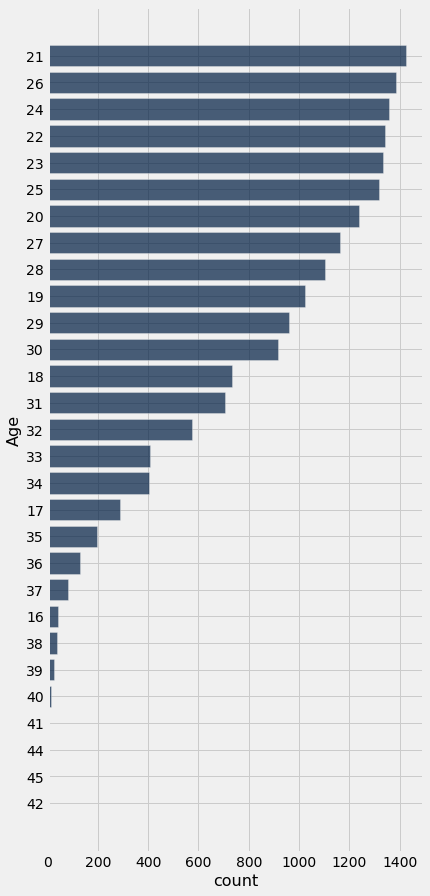

In [8]:
# bar graph
age_distribution = fifa.group('Age')
age_distribution.sort('count',descending=True).barh('Age')


### Drawing a line graph where x-axis is age and y-axis is the count of the players.

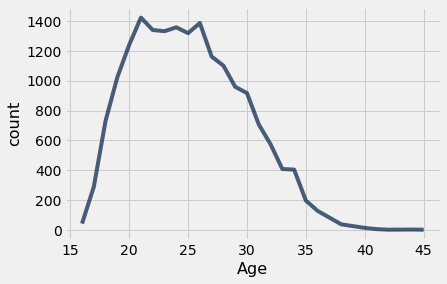

In [9]:
# line graph
age_distribution = fifa.group('Age')
age_distribution.sort('count').plot('Age','count')

## Part 6

### Creating 2 new tables from fifa table. 

### First table will be called top_players and will include top 10 players.

### Second table will be called bottom_players and will include last 100 players based on Overall scores. 

### Both tables will include only Name, Age, Overall, and Wage columns.

In [59]:
top_players = fifa.sort('Overall', descending=True).take(np.arange(10)).select('Name','Age','Overall','Wage')
bottom_players = fifa.sort('Overall', descending=False).take(np.arange(100)).select('Name','Age','Overall','Wage')

In [60]:
top_players.show()

In [61]:
bottom_players.show()

## Part 7

### Taking top 100 football players based on their overall scores. Then, ploting the bar graph of Club column in descending order. It appears that there is a player in this list from Turkish club Beşiktaş.

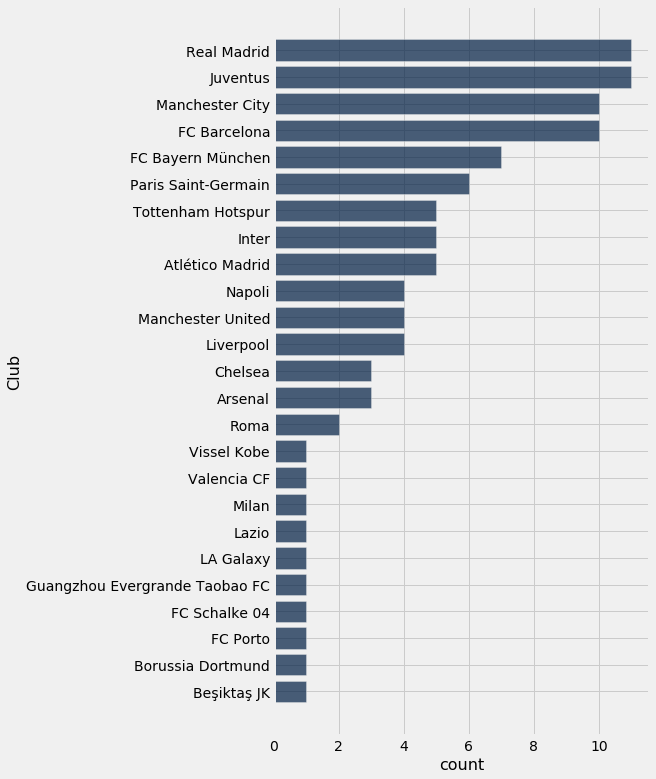

In [13]:
# bar graph
fifa.sort('Overall', descending=True).take(np.arange(100)).group('Club').sort('count', descending=True).barh('Club')

### Who is this player?

In [14]:
# there is a player in this list from Turkish club Beşiktaş. Who is this player?
print('This Player is Pepe.')

This Player is Pepe


## Part 8

### Creating a new table called fifa_updated table from fifa . 

### The table should include only Name, Age, Nationality, Overall, Club, Value, Wage and Position columns. However, Value and Wage column needs to be changed such that the values are in numerical format. 

#### For example, Cristiano Ronaldo’s wage is €405K, then the change should be €405K into a number, 405000.


In [54]:
def change (x):
    if x[-1] == 'M':
        x = x.replace('€', '')
        x = x.replace('M', '')
        return int(int(float(x)*1000000))
    if x[-1] == 'K':
        x = x.replace('€', '')
        x = x.replace('K', '')
        return int(int(float(x)*1000)) 
    return(0)
    
fifa_updated = fifa.select('Name','Age','Nationality','Overall','Club','Position').with_column('Value', fifa.apply(change, 'Value'), 'Wage',  fifa.apply(change, 'Wage')).set_format([6, 7], NumberFormatter)

In [55]:
fifa_updated.show()

## Part 9

### Select the top 100 players based on their Wage. Draw Overall vs. Wage scatter plot where x axis is Overall and y axis is Wage. 

Text(0, 0.5, 'Wage')

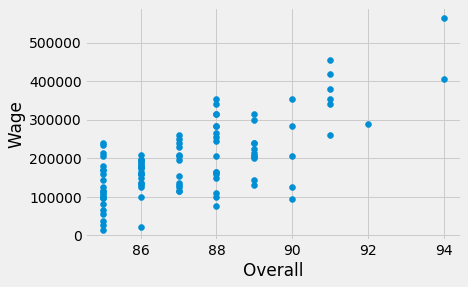

In [17]:
# scatter plot
top_100_overall_fifa_updated = fifa_updated.sort('Overall', descending=True).take(np.arange(100))
plots.scatter(top_100_overall_fifa_updated.column(3),top_100_overall_fifa_updated.column(7))
plots.xlabel('Overall')
plots.ylabel('Wage')

### Do you see any association between these two variable?

In [68]:
# Do you see any association between these two variable?
print("Yes there is association. There is a positive relationship between Overall and Wage values. Since we move from left to right we can observe \
a slope which belongs to a line that has been a clustering around it.")

There is a positive relationship between Overall and Wage values. Since we move from left to right we can observe a slope which belongs to a line that has been a clustering around it.


## Part 10 

### Select the top 100 players based on their Value. Draw Value vs. Wage scatter plot where x axis is Value and y axis is Wage.

Text(0, 0.5, 'Wage')

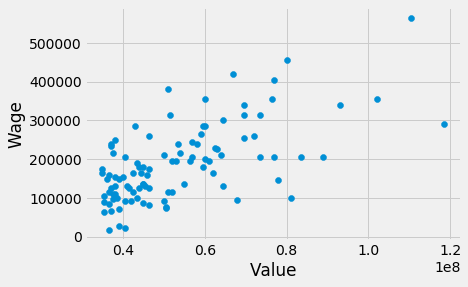

In [19]:
# scatter plot
top_100_value_fifa_updated = fifa_updated.sort('Value', descending=True).take(np.arange(100))
plots.scatter(top_100_value_fifa_updated.column(6),top_100_value_fifa_updated.column(7))
plots.xlabel('Value')
plots.ylabel('Wage')

### Do you see any association between these two variable?

In [69]:
# Do you see any association between these two variable
print("Yes there is association. In this one the relation between Wage and Value not much clear but there is still a positive relation between these two \
variables because we can see again a clustering around a line with a slope from 0 to up-right corner of the graph.")

In this one the relation between Wage and Value not much clear but there is still a positive relation between these two variables because we can see again a clustering around a line with a slope from 0 to up-right corner of the graph.


## Part 11

### In top 100 players with highest Value, drawing bar chart to show the distribution of Nationality of players.

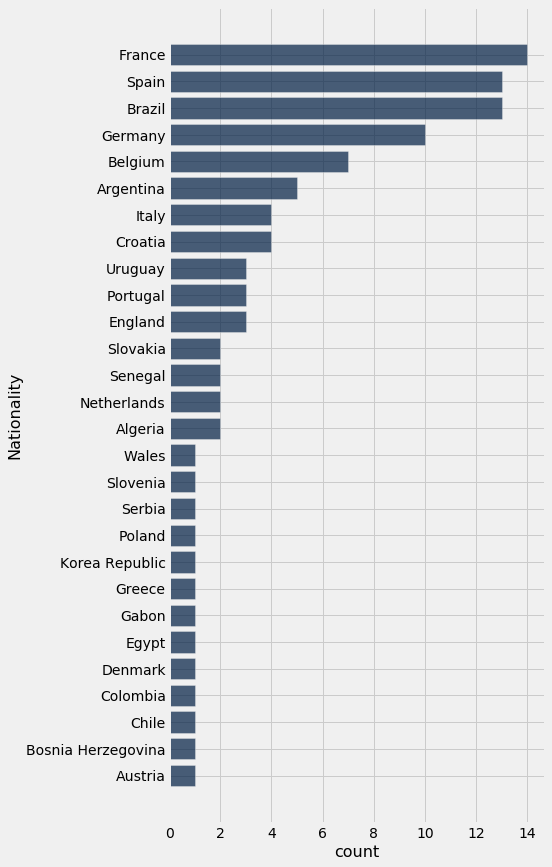

In [21]:
# bar chart
top_100_value_fifa_updated.group('Nationality').sort('count', descending=True).barh('Nationality')

## Part 12

### Players of which nationality has the highest average Wage?

In [43]:
# Players of which nationality has the highest average salary?

wage_fifa_updated = fifa_updated.sort('Wage', descending=True)
avarage_wages = wage_fifa_updated.select('Nationality', 'Wage').sort('Nationality')

sum_of_all = avarage_wages.group('Nationality', sum)
number_of_all = avarage_wages.group('Nationality')

avarages=[]
for i,j in zip(sum_of_all.column('Wage sum'),number_of_all.column('count')):
    avarages.append(i/j)

final_avarage = sum_of_all.select('Nationality').with_column('Avarages', avarages)

print('The answer is Dominican Republic... \n')
final_avarage.sort('Avarages', descending=True).set_format([1], NumberFormatter).take(0)


164
164
164


Nationality        | Avarages
Dominican Republic | 71000

## Part 13

### Selecting top 100 players based on ‘Overall’ score and ploting a histogram of their Wages. Using the following bins;
### bins=[0,100000,150000,200000,300000,500000,600000]

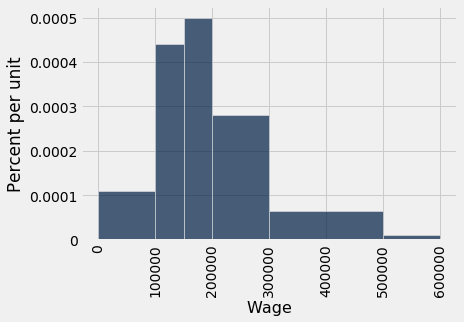

In [35]:
# histogram
fifa_updated.sort('Overall', descending=True).take(np.arange(100)).hist('Wage', bins = [0,100000,150000,200000,300000,500000,600000])
